In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Churn_Modelling.csv')


In [35]:
# Display the first few rows
print(df.head())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [36]:

# Get information about the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [37]:

# Display summary statistics
print(df.describe())


         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

In [38]:

# Check for missing values
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [39]:
# Count the number of churned and non-churned customers
churn_distribution = df['Exited'].value_counts()
print(churn_distribution)

Exited
0    7963
1    2037
Name: count, dtype: int64


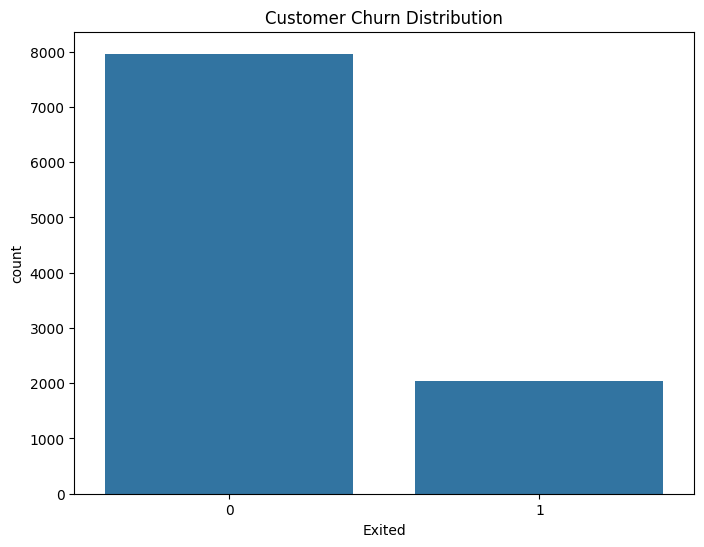

In [40]:
# Visualize the churn distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Exited', data=df)
plt.title('Customer Churn Distribution')
plt.show()

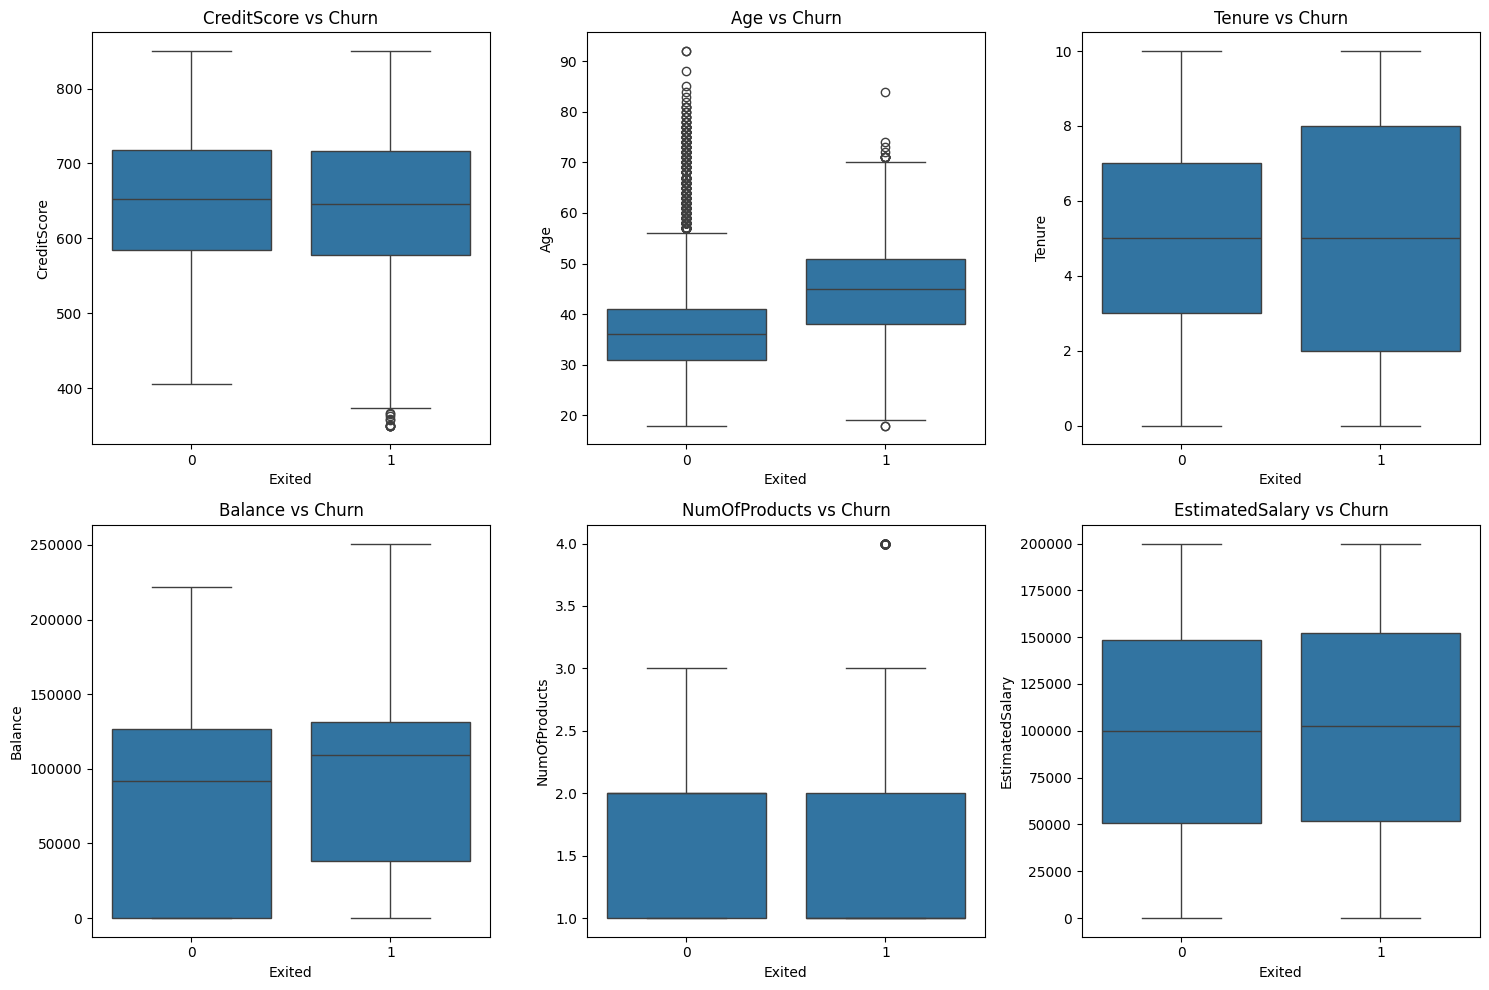

In [41]:
# List of numerical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Create box plots for numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Exited', y=feature, data=df)
    plt.title(f'{feature} vs Churn')
plt.tight_layout()
plt.show()

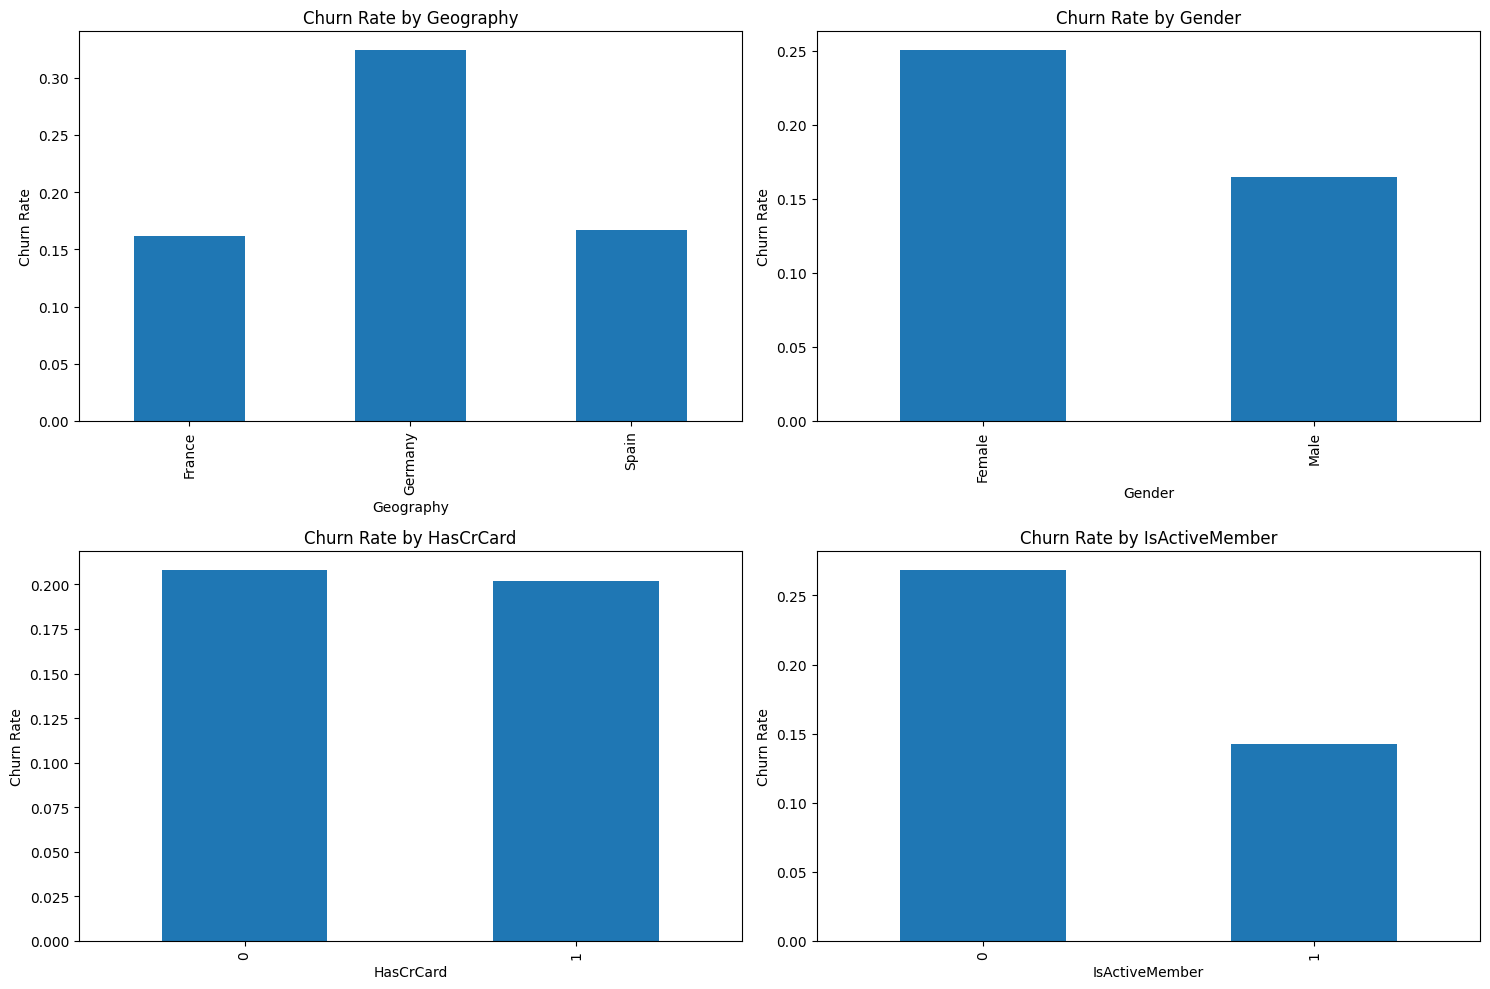

In [42]:
# List of categorical features
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

# Create bar plots for categorical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    df.groupby(feature)['Exited'].mean().plot(kind='bar')
    plt.title(f'Churn Rate by {feature}')
    plt.ylabel('Churn Rate')
plt.tight_layout()
plt.show()

In [43]:
# Identify numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
print("Numeric columns:", numeric_columns)


Numeric columns: Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


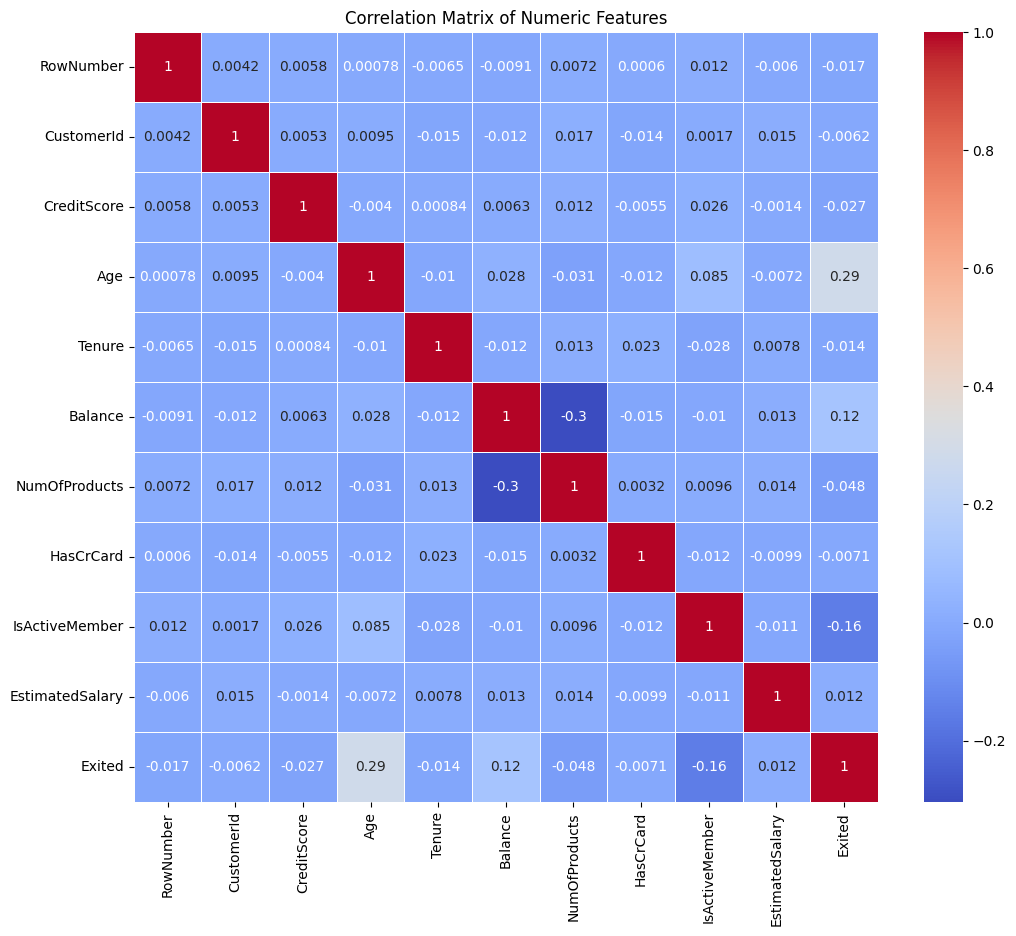

In [44]:
# Create a correlation matrix for numeric columns only
corr_matrix = df[numeric_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


Categorical columns: Index(['Surname', 'Geography', 'Gender'], dtype='object')


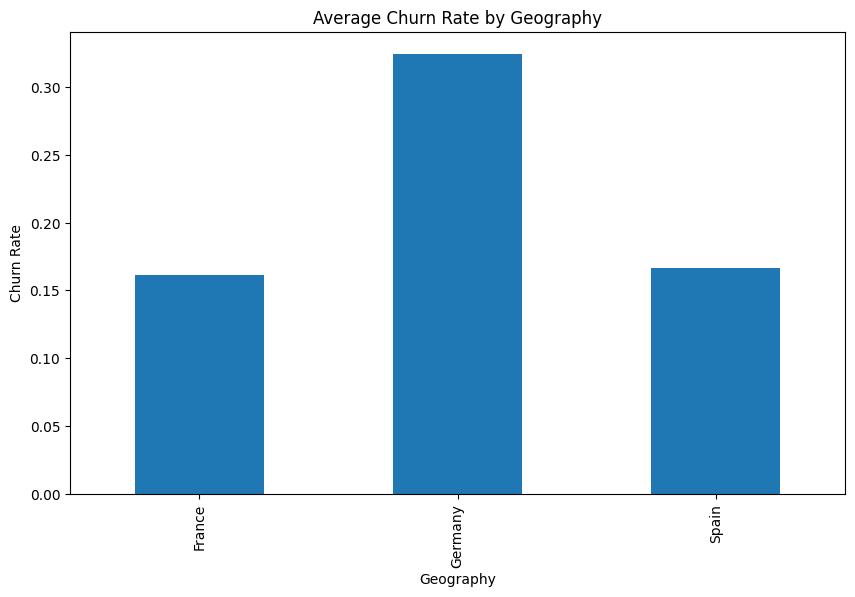

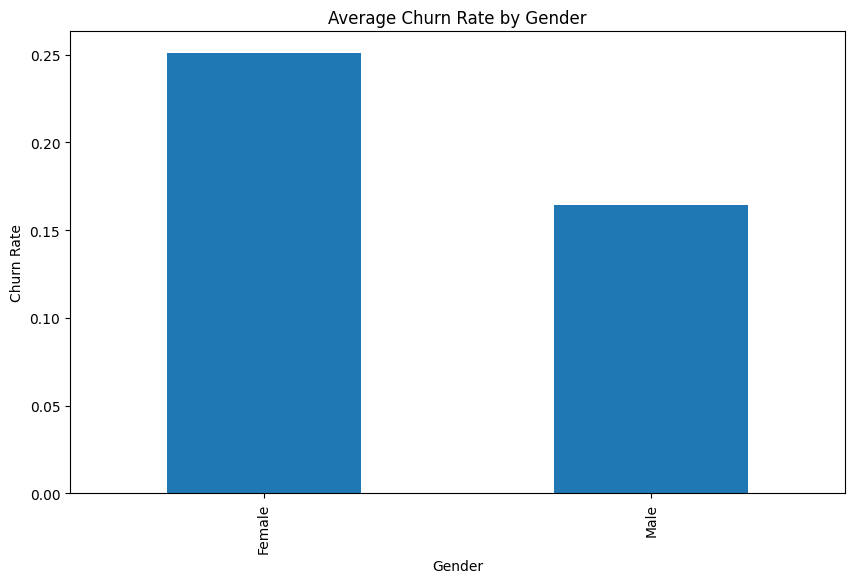

In [45]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

# Analyze categorical variables
for col in categorical_columns:
    if col != 'Surname':  # Exclude 'Surname' as it's likely not relevant for analysis
        plt.figure(figsize=(10, 6))
        df.groupby(col)['Exited'].mean().plot(kind='bar')
        plt.title(f'Average Churn Rate by {col}')
        plt.ylabel('Churn Rate')
        plt.show()


now we clean this data

In [46]:
# Check for missing values
print(df.isnull().sum())

# If any missing values are found, handle them appropriately
# For example, you can drop rows with missing values:
df = df.dropna()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [47]:

# 1. Remove unnecessary columns
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df_cleaned = df.drop(columns_to_drop, axis=1)

print("\nShape after dropping columns:", df_cleaned.shape)


Shape after dropping columns: (10000, 11)


In [48]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# 2. Encode categorical variables
le_geography = LabelEncoder()
le_gender = LabelEncoder()

df_cleaned['Geography'] = le_geography.fit_transform(df_cleaned['Geography'])
df_cleaned['Gender'] = le_gender.fit_transform(df_cleaned['Gender'])

print("\nUnique values after encoding:")
print("Geography:", dict(enumerate(le_geography.classes_)))
print("Gender:", dict(enumerate(le_gender.classes_)))


Unique values after encoding:
Geography: {0: 'France', 1: 'Germany', 2: 'Spain'}
Gender: {0: 'Female', 1: 'Male'}


In [49]:
# 3. Scale numerical features
scaler = StandardScaler()
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 
                     'NumOfProducts', 'EstimatedSalary']

df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])

# Display summary statistics of scaled features
print("\nScaled numerical features summary:")
print(df_cleaned[numerical_features].describe())

# Split into features and target
X = df_cleaned.drop('Exited', axis=1)
y = df_cleaned['Exited']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nFinal dataset shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)


Scaled numerical features summary:
        CreditScore           Age        Tenure       Balance  NumOfProducts  \
count  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04   1.000000e+04   
mean  -4.824585e-16  2.318146e-16 -1.078249e-16 -6.252776e-17   1.634248e-17   
std    1.000050e+00  1.000050e+00  1.000050e+00  1.000050e+00   1.000050e+00   
min   -3.109504e+00 -1.994969e+00 -1.733315e+00 -1.225848e+00  -9.115835e-01   
25%   -6.883586e-01 -6.600185e-01 -6.959818e-01 -1.225848e+00  -9.115835e-01   
50%    1.522218e-02 -1.832505e-01 -4.425957e-03  3.319639e-01  -9.115835e-01   
75%    6.981094e-01  4.842246e-01  6.871299e-01  8.199205e-01   8.077366e-01   
max    2.063884e+00  5.061197e+00  1.724464e+00  2.795323e+00   4.246377e+00   

       EstimatedSalary  
count     1.000000e+04  
mean     -2.877698e-17  
std       1.000050e+00  
min      -1.740268e+00  
25%      -8.535935e-01  
50%       1.802807e-03  
75%       8.572431e-01  
max       1.737200e+00  

Final dataset sha

In [50]:
# Save preprocessed data
df_cleaned.to_csv('preprocessed_data.csv', index=False)